# Scrape data
Author Brian Tam, 11/04/2020

This notebook is used to call Beautiful Soup and scrape most of the necessary information that is needed to understand the [Bible corpus](https://www.kaggle.com/oswinrh/bible) as an intermediate setup to prep it for moding. 

- The BBE translation was chosen as the primary translation of use. Thus much of the additional research was done on the nature of basic english vocabulary
- The names of the books of the Old and New Testiment were scraped to provide labels for each verse

In [2]:
'''
import pandas for DF's, np for math, seaborn/pyplot for plotting, sklearn and stastics
'''
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys, sklearn
import time

#import requests to turn url into soup
from bs4 import BeautifulSoup
import requests

%matplotlib inline 

# Basic English Vocab

In [17]:
htmlp = 'http://ogden.basic-english.org/wordalph.html'
response = requests.get(htmlp)
page = response.text

#remove some of the html notation by turning into soup
soup = BeautifulSoup(page)

In [13]:
soup.find_all('a')

[<a class="visually-hidden focusable skip-link" href="#main-content">
       Skip to main content
     </a>,
 <a class="site-logo" href="https://usccb.org" rel="home">
 <img alt="Home" src="/themes/custom/usccb_readings/usccb-logo.svg"/>
 </a>,
 <a class="btn blue big store" href="http://store.usccb.org/" target="_blank">Store</a>,
 <a class="btn big" container="mobile-off" data-drupal-link-system-path="node/25731" href="https://usccb.org/help-now" target="_self">Help Now</a>,
 <a class="btn big" container="mobile-on" href="https://bible.usccb.org/">Readings</a>,
 <a class="icon icon-search no-label" data-drupal-link-system-path="search" href="https://usccb.org/search">Search</a>,
 <a href="https://bible.usccb.org/">Daily Readings</a>,
 <a data-drupal-link-system-path="mass-times" href="https://usccb.org/mass-times">Find a Parish</a>,
 <a data-drupal-link-system-path="node/51478" href="https://usccb.org/committees/protection-children-young-people/how-report-abuse">Report Abuse</a>,
 <a

In [35]:
''.join(soup.find_all('br')[1].next_siblings)

'\r\na , able , about , account , acid , across , act , addition , adjustment , advertisement ,\r\n after , again , against , agreement , air , all , almost ,\r\namong , amount , amusement ,  and , angle , angry , animal , answer , ant , any ,\r\napparatus , apple , approval , arch , argument , arm , army , art , as ,\r\nat , attack , attempt , attention , attraction , authority  , automatic , awake .\r\n\r\n'

In [3]:
basic_dict = {}
for h3 in soup.find_all('h3'):
    basic_dict[f'{h3.text}']

<!DOCTYPE html PUBLIC "-//IETF//DTD HTML//EN">
<html>
<head>
<title>Ogden's Basic English Words</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="James L Bauer" name="AUTHOR"/>
<meta content="Basic English is a simplified version of English language created by Charles Kay Ogden. Here are the 850 words in his order." name="DESCRIPTION"/>
<meta content="Basic English, Ogden's Basic English, Auxiliary Language, International Language, International Auxiliary Language,
Ogden, Charles Ogden, Charles K Ogden, Charles K. Ogden, Charles Kay Ogden,
C. K. Ogden, C K Ogden, I. A. Richards, I A Richards, Ivor Richards, 850 words,
language, languages, English language, learning English" name="KEYWORDS"/>
<link href="basiceng.css" rel="StyleSheet" type="text/css"/>
<link href="favicon.gif" rel="icon" type="image/gif"/>
</head>
<body leftmargin="100" rightmargin="200">
<img align="left" alt="logo" border="0" src="gif/logo.gif"/>
<h2 align="center">
Odgen's BA

In [38]:
basic_str = '''
come, get, give, go, keep, let, make, put, seem, take, be, do, have, say, see, send, may, will,
about, across, after, against, among, at, before, between, by, down, from, in, off, on, over, through, to, under, up, with,
as, for, of, till, than,
a , the, all, any, every, little, much, no, other, some, such, that, this, I , he, you, who,
and, because, but, or, if, though, while, how, when, where, why,
again, ever, far, forward, here, near, now, out, still, then, there, together, well,
almost, enough, even, not, only, quite, so, very, tomorrow, yesterday,
north, south, east, west, please, yes,
account, act, addition, adjustment, advertisement, agreement, air, amount, amusement, animal, answer, apparatus, approval, argument, art, attack, attempt, attention, attraction, authority, back, balance, base, behavior, belief, birth, bit, bite, blood, blow, body, brass, bread, breath, brother, building, burn, burst, business, butter, canvas, care, cause, chalk, chance, change, cloth, coal, color, comfort, committee, company, comparison, competition, condition, connection, control, cook, copper, copy, cork, cotton, cough, country, cover, crack, credit, crime, crush, cry, current, curve, damage, danger, daughter, day, death, debt, decision, degree, design, desire, destruction, detail, development, digestion, direction, discovery, discussion, disease, disgust, distance, distribution, division, doubt, drink, driving, dust, earth, edge, education, effect, end, error, event, example, exchange, existence, expansion, experience, expert, fact, fall, family, father, fear, feeling, fiction, field, fight, fire, flame, flight, flower, fold, food, force, form, friend, front, fruit, glass, gold, government, grain, grass, grip, group, growth, guide, harbor, harmony, hate, hearing, heat, help, history, hole, hope, hour, humor, ice, idea, impulse, increase, industry, ink, insect, instrument, insurance, interest, invention, iron, jelly, join, journey, judge, jump, kick, kiss, knowledge, land, language, laugh, law, lead, learning, leather, letter, level, lift, light, limit, linen, liquid, list, look, loss, love, machine, man, manager, mark, market, mass, meal, measure, meat, meeting, memory, metal, middle, milk, mind, mine, minute, mist, money, month, morning ,mother, motion, mountain, move, music, name, nation, need, news, night, noise, note, number, observation, offer, oil, operation, opinion, order, organization, ornament, owner, page, pain, paint, paper, part, paste, payment, peace, person, place, plant, play, pleasure, point, poison, polish, porter, position, powder, power, price, print, process, produce, profit, property, prose, protest, pull, punishment, purpose, push, quality, question, rain, range, rate, ray, reaction, reading, reason, record, regret, relation, religion, representative, request, respect, rest, reward, rhythm, rice, river, road, roll, room, rub, rule, run, salt, sand, scale, science, sea, seat, secretary, selection, self, sense, servant, sex, shade, shake, shame, shock, side, sign, silk, silver, sister, size, sky, sleep, slip, slope, smash, smell, smile, smoke, sneeze, snow, soap, society, son, song, sort, sound, soup, space, stage, start, statement, steam, steel, step, stitch, stone, stop, story, stretch, structure, substance, sugar, suggestion, summer, support, surprise, swim, system, talk, taste, tax, teaching, tendency, test, theory, thing, thought, thunder, time, tin, top, touch, trade, transport, trick, trouble, turn, twist, unit, use, value, verse, vessel, view, voice, walk, war, wash, waste, water, wave, wax, way, weather, week, weight, wind, wine, winter, woman, wood, wool, word, work, wound, writing , year,
angle, ant, apple, arch, arm, army, baby, bag, ball, band, basin, basket, bath, bed, bee, bell, berry, bird, blade, board, boat, bone, book, boot, bottle, box, boy, brain, brake, branch, brick, bridge, brush, bucket, bulb, button, cake, camera, card, cart, carriage, cat, chain, cheese, chest, chin, church, circle, clock, cloud, coat, collar, comb, cord, cow, cup, curtain, cushion, dog, door, drain, drawer, dress, drop, ear, egg, engine, eye, face, farm, feather, finger, fish, flag, floor, fly, foot, fork, fowl, frame, garden, girl, glove, goat, gun, hair, hammer, hand, hat, head, heart, hook, horn, horse, hospital, house, island, jewel, kettle, key, knee, knife, knot, leaf, leg, library, line, lip, lock, map, match, monkey, moon, mouth, muscle, nail, neck, needle, nerve, net, nose, nut, office, orange, oven, parcel, pen, pencil, picture, pig, pin, pipe, plane, plate, plough/plow, pocket, pot, potato, prison, pump, rail, rat, receipt, ring, rod, roof, root, sail, school, scissors, screw, seed, sheep, shelf, ship, shirt, shoe, skin, skirt, snake, sock, spade, sponge, spoon, spring, square, stamp, star, station, stem, stick, stocking, stomach, store, street, sun, table, tail, thread, throat, thumb, ticket, toe, tongue, tooth, town, train, tray, tree, trousers, umbrella, wall, watch, wheel, whip, whistle, window, wing, wire, worm,
able, acid, angry, automatic, beautiful, black, boiling, bright, broken, brown, cheap, chemical, chief, clean, clear, common, complex, conscious, cut, deep, dependent, early, elastic, electric, equal, fat, fertile, first, fixed, flat, free, frequent, full, general, good, great, grey/gray, hanging, happy, hard, healthy, high, hollow, important, kind, like, living, long, male, married, material, medical, military, natural, necessary, new, normal, open, parallel, past, physical, political, poor, possible, present, private, probable, quick, quiet, ready, red, regular, responsible, right, round, same, second, separate, serious, sharp, smooth, sticky, stiff, straight, strong, sudden, sweet, tall, thick, tight, tired, true, violent, waiting, warm, wet, wide, wise, yellow, young,
awake, bad, bent, bitter, blue, certain, cold, complete, cruel, dark, dead, dear, delicate, different, dirty, dry, false, feeble, female, foolish, future, green, ill, last, late, left, loose, loud, low, mixed, narrow, old, opposite, public, rough, sad, safe, secret, short, shut, simple, slow, small, soft, solid, special, strange, thin, white, wrong
'''

In [43]:
basic_english_list = basic_str.replace('\n', '').replace(' ','').split(',')

In [44]:
import pickle
pd.to_pickle(basic_english_list,'basic_english_list.pkl')

# Books of the Bible

### There are 66 books in the bible
Our previous source included some of the books in the Catholic bible   
so I had to pivot and found a new site:

In [3]:
htmlp = 'https://www.christianity.com/bible/bible.php?ver=kjv'
response = requests.get(htmlp)
page = response.text

#remove some of the html notation by turning into soup
soup = BeautifulSoup(page)

# Create list of the books of the bible
OT_books = [book.text for book in soup.find('ul', class_="nav nav-pills nav-stacked").find_all('a')]
OT_books

['Genesis',
 'Exodus',
 'Leviticus',
 'Numbers',
 'Deuteronomy',
 'Joshua',
 'Judges',
 'Ruth',
 '1 Samuel',
 '2 Samuel',
 '1 Kings',
 '2 Kings',
 '1 Chronicles',
 '2 Chronicles',
 'Ezra',
 'Nehemiah',
 'Esther',
 'Job',
 'Psalms',
 'Proverbs',
 'Ecclesiastes',
 'Song of Solomon',
 'Isaiah',
 'Jeremiah',
 'Lamentations',
 'Ezekiel',
 'Daniel',
 'Hosea',
 'Joel',
 'Amos',
 'Obadiah',
 'Jonah',
 'Micah',
 'Nahum',
 'Habakkuk',
 'Zephaniah',
 'Haggai',
 'Zechariah',
 'Malachi']

In [4]:
NT_books = [book.text for book in soup.find_all('ul', class_="nav nav-pills nav-stacked")[1].find_all('a')]
NT_books

['Matthew',
 'Mark',
 'Luke',
 'John',
 'Acts',
 'Romans',
 '1 Corinthians',
 '2 Corinthians',
 'Galatians',
 'Ephesians',
 'Philippians',
 'Colossians',
 '1 Thessalonians',
 '2 Thessalonians',
 '1 Timothy',
 '2 Timothy',
 'Titus',
 'Philemon',
 'Hebrews',
 'James',
 '1 Peter',
 '2 Peter',
 '1 John',
 '2 John',
 '3 John',
 'Jude',
 'Revelation']

In [5]:
books_of_bible = OT_books + NT_books
len(books_of_bible)

66

66 books! Perfect!

In [31]:
books_dict = dict(zip(range(1,67),books_of_bible))
pd.to_pickle(books_dict,'data/books_dict.pkl')

# Sections of the bible

### Genre
The second division is a little more complicated because it's based on genres of literature. Within the Old and New Testaments, the books are organized such that all of the histories are together, all of the gospels are together, and so on. The genres of Biblical literature in the Old Testament include:

**The Pentateuch, or the Books of the Law:** Genesis, Exodus, Leviticus, Numbers, and Deuteronomy  
**[Old Testament] Historical Books:** Joshua, Judges, Ruth, 1 Samuel, 2 Samuel, 1 Kings, 2 Kings, 1 Chronicles, 2 Chronicles, Ezra, Nehemiah, and Esther  
**Wisdom Literature:** Job, Psalms, Proverbs, Ecclesiastes, and the Song of Solomon  
**The Prophets:** Isaiah, Jeremiah, Lamentations, Ezekiel, Daniel, Hosea, Joel, Amos, Obadiah, Jonah, Micah, Nahum, Habakkuk, Zephaniah, Haggai, Zechariah, and Malachi

The different literary genres of the New Testament are:

**The Gospels:** Matthew, Mark, Luke, and John  
**[New Testament] Historical Books:** Acts  
**Epistles (Letters):** Romans, 1 Corinthians, 2 Corinthians, Galatians, Ephesians, Philippians, Colossians, 1 Thessalonians, 2 Thessalonians, 1 Timothy, 2 Timothy, Titus, Philemon, Hebrews, James, 1 Peter, 2 Peter, 1 John, 2 John, 3 John, and Jude  
**Prophetic/Apocalyptic Literature:** Revelation

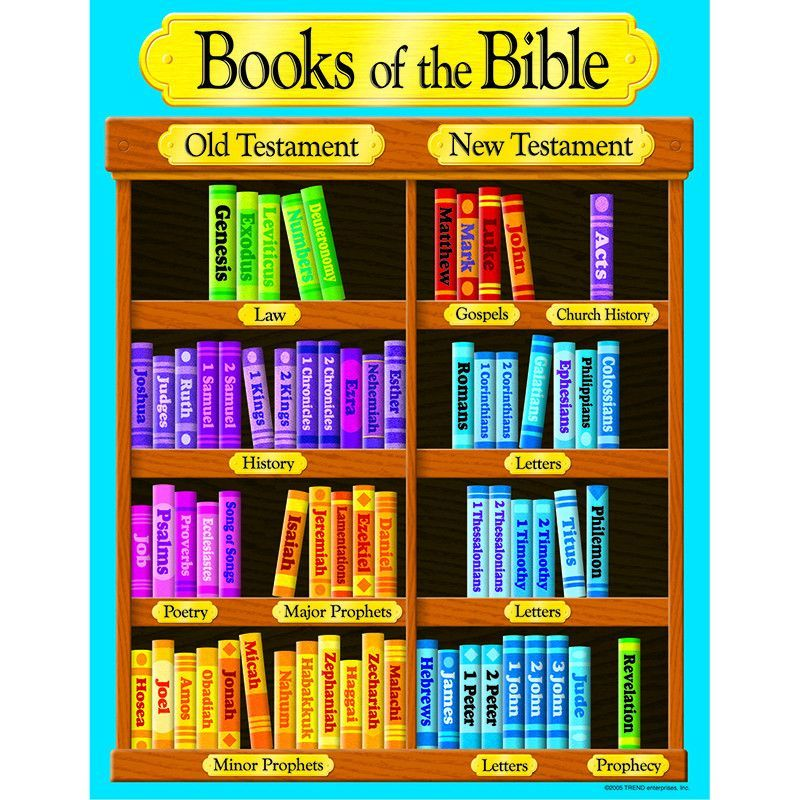!

In [26]:
sections = ['Law']*5 + ['Historical']*12 + ['Poetry']*5 +['Major Prophets']*5 + ['Minor Prophets']*12 + ['Gospels']*4 + ['Church'] + ['Pauline Letters']*13 + ['General Letters']*8 + ['Prophecy']

In [28]:
sections_dict = dict(zip(books_of_bible,sections))
sections_dict

{'Genesis': 'Law',
 'Exodus': 'Law',
 'Leviticus': 'Law',
 'Numbers': 'Law',
 'Deuteronomy': 'Law',
 'Joshua': 'Historical',
 'Judges': 'Historical',
 'Ruth': 'Historical',
 '1 Samuel': 'Historical',
 '2 Samuel': 'Historical',
 '1 Kings': 'Historical',
 '2 Kings': 'Historical',
 '1 Chronicles': 'Historical',
 '2 Chronicles': 'Historical',
 'Ezra': 'Historical',
 'Nehemiah': 'Historical',
 'Esther': 'Historical',
 'Job': 'Poetry',
 'Psalms': 'Poetry',
 'Proverbs': 'Poetry',
 'Ecclesiastes': 'Poetry',
 'Song of Solomon': 'Poetry',
 'Isaiah': 'Major Prophets',
 'Jeremiah': 'Major Prophets',
 'Lamentations': 'Major Prophets',
 'Ezekiel': 'Major Prophets',
 'Daniel': 'Major Prophets',
 'Hosea': 'Minor Prophets',
 'Joel': 'Minor Prophets',
 'Amos': 'Minor Prophets',
 'Obadiah': 'Minor Prophets',
 'Jonah': 'Minor Prophets',
 'Micah': 'Minor Prophets',
 'Nahum': 'Minor Prophets',
 'Habakkuk': 'Minor Prophets',
 'Zephaniah': 'Minor Prophets',
 'Haggai': 'Minor Prophets',
 'Zechariah': 'Minor Pr

In [30]:
pd.to_pickle(sections_dict,'data/sections_dict.pkl')